In [1]:
from asr import ASR
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = os.getcwd()+'/Raw/'

data_file = 'Svea_record_session1-[2020.07.02-19.19.49].csv'
mat_fname = os.path.join(data_path, data_file)
data1 = np.genfromtxt(mat_fname, skip_header = 1)
data1 = np.nan_to_num(data1, copy = False)

data_file = 'svea_record-session2[2020.07.02-21.45.06].csv'
mat_fname = os.path.join(data_path, data_file)
data2 = np.genfromtxt(mat_fname, delimiter=',')
data2 = data2[:,3:11].T
data2 = np.nan_to_num(data2, copy = False)


data_file = 'record-[2020.07.02-18.14.02].csv'
mat_fname = os.path.join(data_path, data_file)
data3 = np.genfromtxt(mat_fname, delimiter=',')
data3 = data3[1:,:]
data3 = np.nan_to_num(data3, copy = False)

In [3]:
"""
moved to after ASR!!!!!

data1 -= data1.mean(axis=1).reshape(8,1)
data1 /= data1.std(axis=1).reshape(8,1)
data2 -= data2.mean(axis=1).reshape(8,1)
data2 /= data2.std(axis=1).reshape(8,1)
data3 -= data3.mean(axis=1).reshape(8,1)
data3 /= data3.std(axis=1).reshape(8,1)
"""

'\nmoved to after ASR!!!!!\n\ndata1 -= data1.mean(axis=1).reshape(8,1)\ndata1 /= data1.std(axis=1).reshape(8,1)\ndata2 -= data2.mean(axis=1).reshape(8,1)\ndata2 /= data2.std(axis=1).reshape(8,1)\ndata3 -= data3.mean(axis=1).reshape(8,1)\ndata3 /= data3.std(axis=1).reshape(8,1)\n'

In [4]:
#LOADING DATA
#---------------
#Get data path and load data

ch_names = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']
sfreq=250
info = mne.create_info(ch_names=ch_names, sfreq=sfreq,  ch_types='eeg')
raw1 = mne.io.RawArray(data1, info)
raw2 = mne.io.RawArray(data2, info)
raw3 = mne.io.RawArray(data3, info)

Creating RawArray with float64 data, n_channels=8, n_times=434690
    Range : 0 ... 434689 =      0.000 ...  1738.756 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=422145
    Range : 0 ... 422144 =      0.000 ...  1688.576 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=417217
    Range : 0 ... 417216 =      0.000 ...  1668.864 secs
Ready.


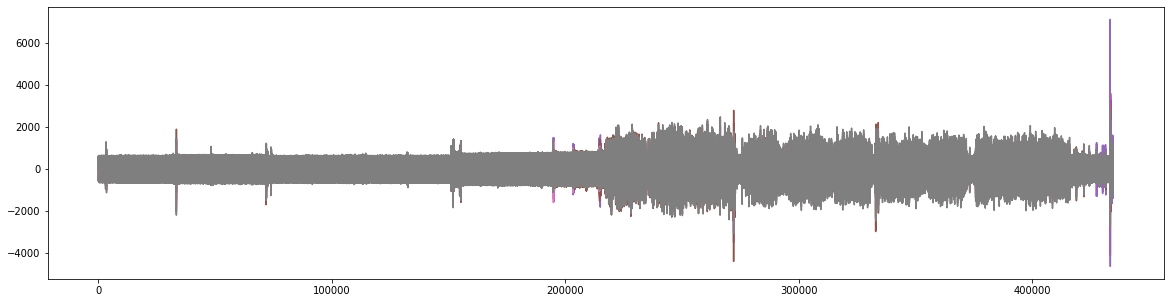

In [5]:
#plot raw data
plt.figure(figsize=(20,5))
plt.plot(raw1.get_data().T);

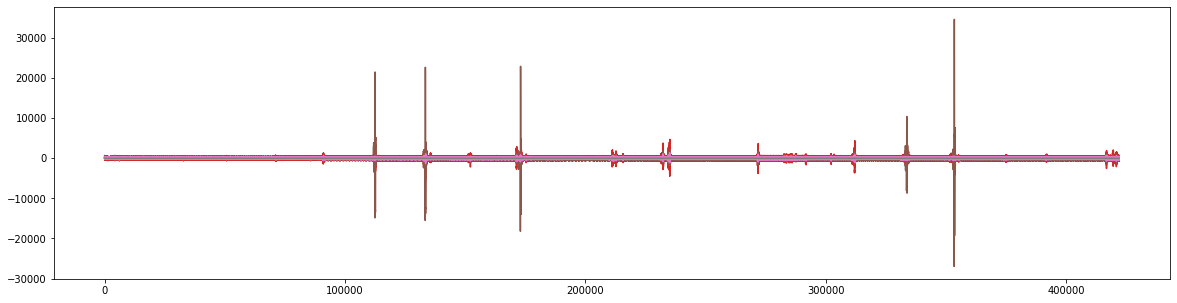

In [6]:
#plot raw data
plt.figure(figsize=(20,5))
plt.plot(raw2.get_data().T);

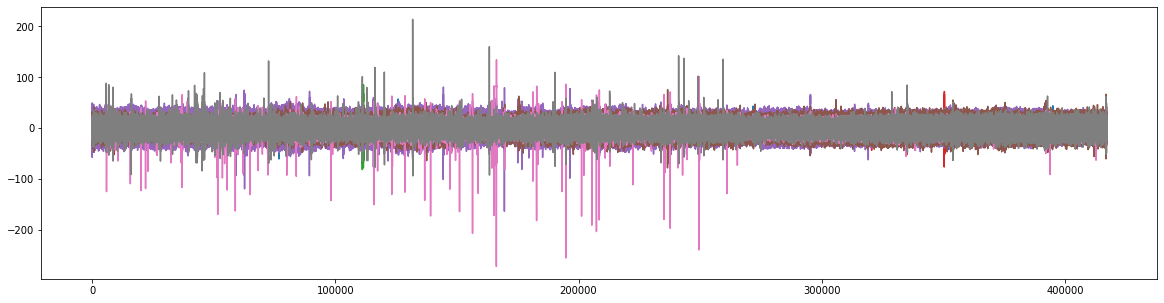

In [7]:
#plot raw data
plt.figure(figsize=(20,5))
plt.plot(raw3.get_data().T);

In [8]:
#PREPROCESSING
#---------------

In [9]:
#Seperate calibration and recording
raw_calib1 = raw1.copy()
raw_calib1.crop(tmax=60.)
raw1.crop(tmin=60.)

raw_calib2 = raw2.copy()
raw_calib2.crop(tmax=60.)
raw2.crop(tmin=60.)

raw_calib3 = raw3.copy()
raw_calib3.crop(tmax=60.)
raw3.crop(tmin=60.)

<RawArray | 8 x 402217 (1608.9 s), ~24.6 MB, data loaded>

In [10]:
#initialize Artifact Subspace Reconstruction
asr1 = ASR()
asr2 = ASR()
asr3 = ASR()

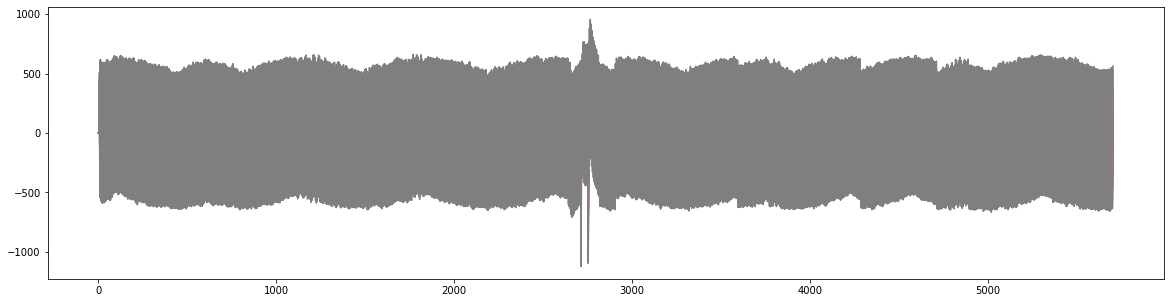

In [11]:
#plot calibration data

x_c1 = asr1.clean_windows(raw_calib1)
plt.figure(figsize=(20,5))
plt.plot(x_c1.T);


/home/matthijspals/BCI-Friendship-Lamps/asr.py:62: RuntimeWarning: invalid value encountered in true_divide
  z_scores = ((rms_scores - mu)/sig).T #shape = (n_channels, n_windows)
/home/matthijspals/.local/lib/python3.8/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/matthijspals/BCI-Friendship-Lamps/asr.py:73: RuntimeWarning: invalid value encountered in less
  np.std(z_scores, axis=0) < .1)


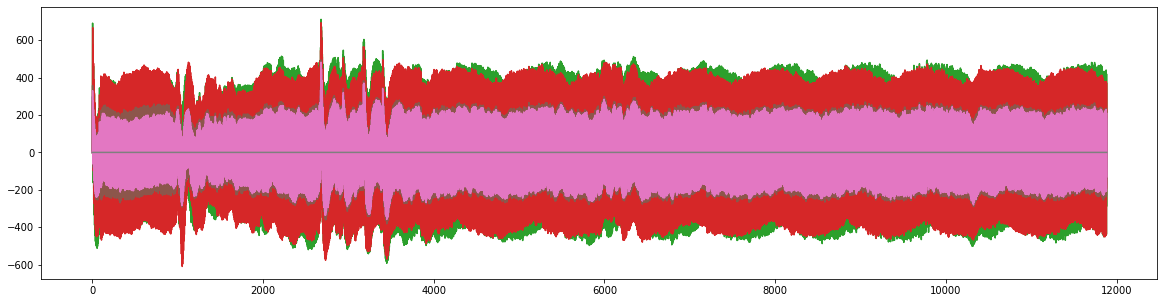

In [12]:
x_c2 = asr2.clean_windows(raw_calib2)
plt.figure(figsize=(20,5))
plt.plot(x_c2.T);

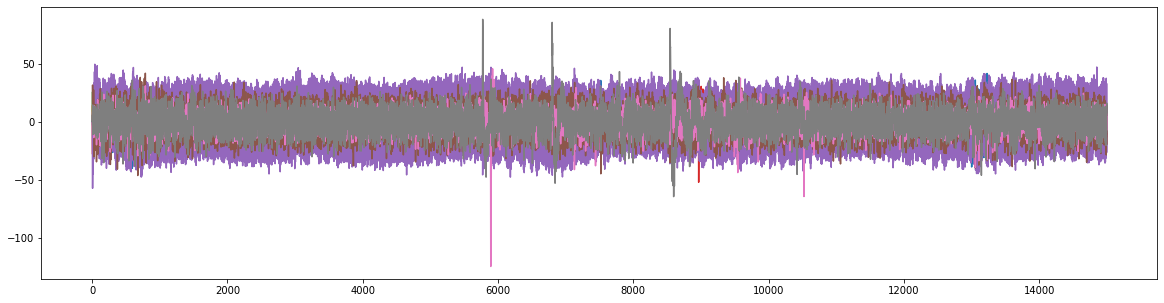

In [13]:
x_c3 = asr3.clean_windows(raw_calib3)
plt.figure(figsize=(20,5))
plt.plot(x_c3.T);

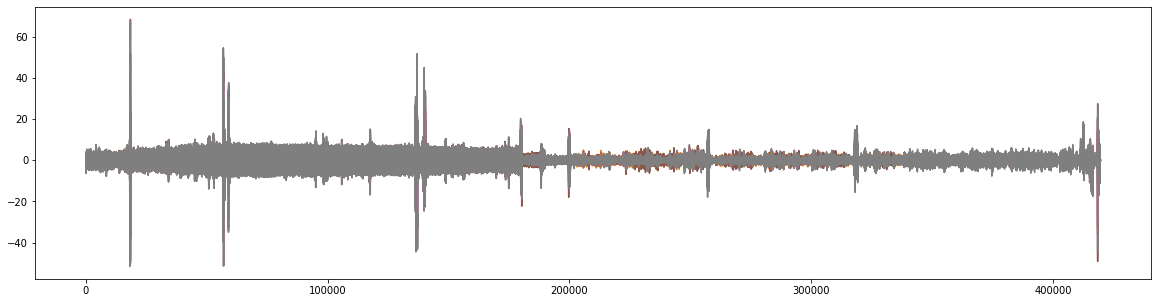

In [14]:
# clean up signal and plot - reconstruct parts with high amplitude noise such as eyeblinks
asr1.calibrate(k = 15, win_len = 2)
out1 = asr1.clean(raw1, win_len = 2)
plt.figure(figsize=(20,5))
plt.plot(out1.T/100);

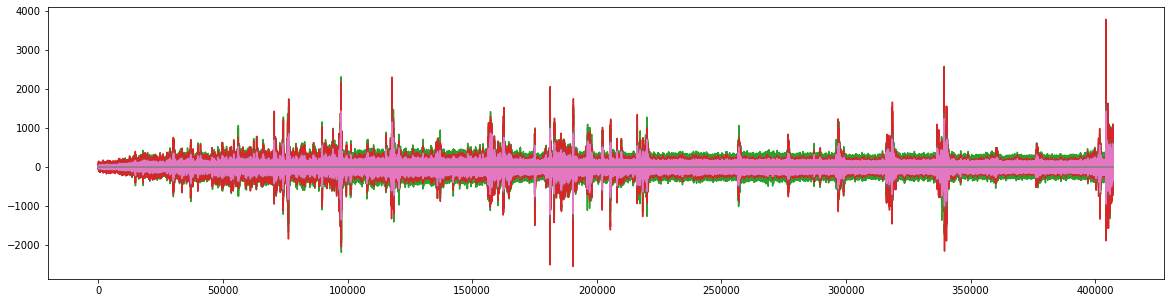

In [15]:
asr2.calibrate(k = 15, win_len = 2)
out2 = asr2.clean(raw2, win_len = 2)
plt.figure(figsize=(20,5))
plt.plot(out2.T);

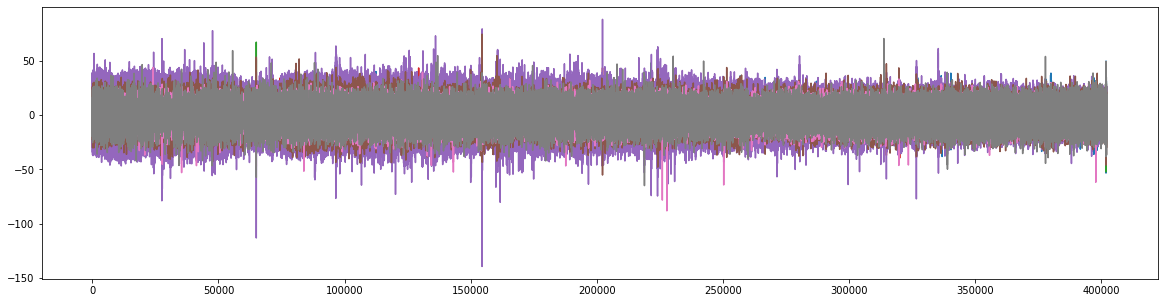

In [16]:
asr3.calibrate(k = 15, win_len = 2)
out3 = asr3.clean(raw3, win_len = 2)
plt.figure(figsize=(20,5))
plt.plot(out3.T);

In [17]:
""" 
to per window???
out1 -= out1.mean(axis=1).reshape(8,1)
out1 /= out1.std(axis=1).reshape(8,1)
out2 -= out2.mean(axis=1).reshape(8,1)
out2 /= out2.std(axis=1).reshape(8,1)
out3 -= out3.mean(axis=1).reshape(8,1)
out3 /= out3.std(axis=1).reshape(8,1)
"""

' \nto per window???\nout1 -= out1.mean(axis=1).reshape(8,1)\nout1 /= out1.std(axis=1).reshape(8,1)\nout2 -= out2.mean(axis=1).reshape(8,1)\nout2 /= out2.std(axis=1).reshape(8,1)\nout3 -= out3.mean(axis=1).reshape(8,1)\nout3 /= out3.std(axis=1).reshape(8,1)\n'

In [18]:
#plt.plot(out1.T);

In [19]:
#plt.plot(out2.T);

In [20]:
#plt.plot(out3.T);

In [21]:
#FEATURE EXTRACTION
#---------------

#concatenate data of same trials

Meditate1 = np.empty((8,0))
Stress1 = np.empty((8,0))
Meditate2 = np.empty((8,0))
Stress2 = np.empty((8,0))
Meditate3 = np.empty((8,0))
Stress3 = np.empty((8,0))


trial_offsets = range(0,len(raw1.times), 80*250)
trial_len = 60*250

for i, o in enumerate(trial_offsets):
    if i<10:
        #print(i, o)
        Meditate1 = np.concatenate((Meditate1, out1[:, o: o+trial_len]), axis = 1)
        Meditate2 = np.concatenate((Meditate2, out2[:, o: o+trial_len]), axis = 1)
        Meditate3 = np.concatenate((Meditate3, out3[:, o: o+trial_len]), axis = 1)
    elif i<20:
        #print(i, o)
        Stress1 = np.concatenate((Stress1, out1[:, o: o+trial_len]), axis = 1)
        Stress2 = np.concatenate((Stress2, out2[:, o: o+trial_len]), axis = 1)
        Stress3 = np.concatenate((Stress3, out3[:, o: o+trial_len]), axis = 1)
        
print("Ses 1 amount of data: Meditate " + str(Meditate1.shape[1]) + " Pos " + str(Stress1.shape[1]))
print("Ses 2 amount of data: Meditate " + str(Meditate2.shape[1]) + " Pos " + str(Stress2.shape[1]))
print("Ses 3 amount of data: Meditate " + str(Meditate3.shape[1]) + " Pos " + str(Stress3.shape[1]))

Ses 1 amount of data: Meditate 150000 Pos 150000
Ses 2 amount of data: Meditate 150000 Pos 150000
Ses 3 amount of data: Meditate 150000 Pos 150000


In [33]:
def sliding_window(data, sf, win_len=2, win_overlap=0.66, normalise = True, alpha = False):
    #win_len and win_overlap in s!

    n_samples = data.shape[1]
    win_samples = int(win_len*sf)
    offsets = np.int_(np.arange(0,  n_samples - win_samples, np.round(win_samples * (1 - win_overlap))))

    #append window
    windows=[]
    for o in offsets:
        win = data[:,o:o+win_samples]
        if normalise:
            win -= win.mean(axis=1).reshape(8,1)
            win /= win.std(axis=1).reshape(8,1)
        #TO DO: PRECOMPUTE FILTER ONCE INSTEAD OF COMPUTING EVERYTIME!!!
        if alpha:
            win = mne.filter.filter_data(win, 250, 2, 20)
        windows.append(win)
        

                       
    return np.array(windows)

In [34]:
#create trials using sliding window

Med_windows1 = sliding_window(Meditate1, 250)
Stress_windows1 = sliding_window(Stress1, 250)
Med_windows2 = sliding_window(Meditate2, 250)
Stress_windows2 = sliding_window(Stress2, 250)
Med_windows3 = sliding_window(Meditate3, 250)
Stress_windows3 = sliding_window(Stress3, 250)


In [35]:
#create labels

labels1 = np.zeros((2, Med_windows1.shape[0]+Stress_windows1.shape[0]))
labels1[0,:Med_windows1.shape[0]]=1
labels1[1,Med_windows1.shape[0]:Med_windows1.shape[0]+Stress_windows1.shape[0]] =1

labels2 = np.zeros((2, Med_windows2.shape[0]+Stress_windows2.shape[0]))
labels2[0,:Med_windows2.shape[0]]=1
labels2[1,Med_windows2.shape[0]:Med_windows2.shape[0]+Stress_windows2.shape[0]] =1


labels3 = np.zeros((2, Med_windows3.shape[0]+Stress_windows3.shape[0]))
labels3[0,:Med_windows3.shape[0]]=1
labels3[1,Med_windows3.shape[0]:Med_windows3.shape[0]+Stress_windows3.shape[0]] =1

In [36]:
#concatenate all data per sess

data1 = np.concatenate((Med_windows1, Stress_windows1), axis = 0)
data2 = np.concatenate((Med_windows2, Stress_windows2), axis = 0)
data3 = np.concatenate((Med_windows3, Stress_windows3), axis = 0)
print(np.shape(data1), np.shape(data2), np.shape(data3))

(1760, 8, 500) (1760, 8, 500) (1760, 8, 500)


In [37]:
#concatenate sessions
data = np.concatenate((data1, data2, data3), axis = 0)
labels = np.concatenate((labels1, labels2, labels3), axis = 1)
print(np.shape(data), np.shape(labels))

(5280, 8, 500) (2, 5280)


In [44]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



#concatenate sessions
data_train = np.concatenate((data1, data3), axis = 0)#data1 #np.concatenate((data1, data3), axis = 0)
labels_train = np.concatenate((labels1, labels3), axis = 1)#labels1 #np.concatenate((labels1, labels3), axis = 1)
X_train, y_train = shuffle(data_train, labels_train.T)

data_test= data2
labels_test = labels2
X_test, y_test = shuffle(data_test, labels_test.T)
#print(np.shape(data), np.shape(labels))

In [45]:
#CLASSIFICATION
#---------------



In [46]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, ShuffleSplit


def train_riemann_ts(X_data, labels):
    # Riemannian Tangent Space Logistic Regression for EEG
    # After spatial filtering, covariances matrices are estimated, then projected in the tangent space and classified with a logistic regression.
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

    # Define a unique pipeline to sequentially:
    clf = make_pipeline(
        Covariances(estimator='lwf'),
        TangentSpace(),
        LogisticRegression(solver='lbfgs'))

    scores = cross_validate(clf, X_data, labels, cv=cv, n_jobs=1, return_estimator=True, return_train_score=False)

    print('Mean: {0}, Std: {1}'.format(scores['test_score'].mean(), scores['test_score'].std()))

    # best_est = scores['estimator'][scores['test_score'].argmax()]
    best_est = clf.fit(X_data, labels)  # refit the estimator on the whole set

    return best_est

In [47]:
#Chance = 0.5!!
X_train = np.nan_to_num(X_train, copy = False)
est = train_riemann_ts(X_train, np.argmax(y_train, axis=1))

Mean: 0.9985795454545455, Std: 0.0008983743352750982


In [48]:
#plot_confusion_matrix(preds, labels, names)
#plt.show()

In [49]:
X_test = np.nan_to_num(X_test, copy = False)
pred = est.predict(X_test)
true = np.argmax(y_test, axis=1)
n = len(pred)

print("accuracy on test: " + str(sum(pred == true)/n))



accuracy on test: 0.7710227272727272
